<a href="https://colab.research.google.com/github/KLuu0/DataVisualization_5304/blob/main/DTSA5304_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Analysis

This project explores a dataset containing standardized test performance for high school students across the United States. The dataset includes demographic and contextual features such as gender, parental level of education, test preparation course completion, and scores in math, reading, and writing.

The primary goal is to uncover patterns in academic achievement and assess how background variables influence student outcomes. Through descriptive statistics and visual analysis, this study aims to answer the following key questions:



1. Do female and male students perform equally well across subjects?
2. Does completing a test preparation course improve academic performance?
3. How does parental level of education affect student scores?


To support this analysis, we will create derived metrics such as an overall average score and a categorical grade. We will also use visual tools such as box plots, histograms, and correlation heatmaps to better understand the relationships in the data.

Ultimately, this analysis intends to provide data-driven insights that could inform educational strategies and support mechanisms to enhance student success.

## Import Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as msno
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## Load Dataset

In [97]:
df = pd.read_csv('/content/StudentsPerformance.csv')

## Explore Dataset

In [98]:
# Unique values and counts for categorical features
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

df['gender'].value_counts()
df['test preparation course'].value_counts()
df['parental level of education'].value_counts()

gender: ['female' 'male']

race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: ['standard' 'free/reduced']

test preparation course: ['none' 'completed']

math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score: [ 74  88  93  

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


## Descriptive Statistics

In [99]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


## Average Score and Grade

In [100]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

def assign_grade(score):
    if score >= 90: return 'A'
    elif score >= 80: return 'B'
    elif score >= 70: return 'C'
    elif score >= 60: return 'D'
    else: return 'F'

df['grade'] = df['average score'].apply(assign_grade)

## 6. Distributions and Correlations

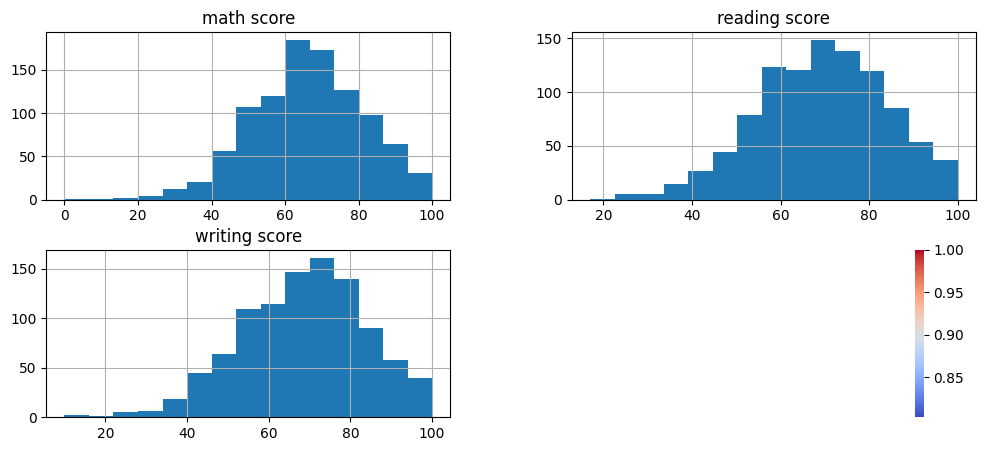

In [101]:
df[['math score', 'reading score', 'writing score']].hist(bins=15, figsize=(12, 5))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()

## 1. Do Male and Female Students Perform Equally Well?

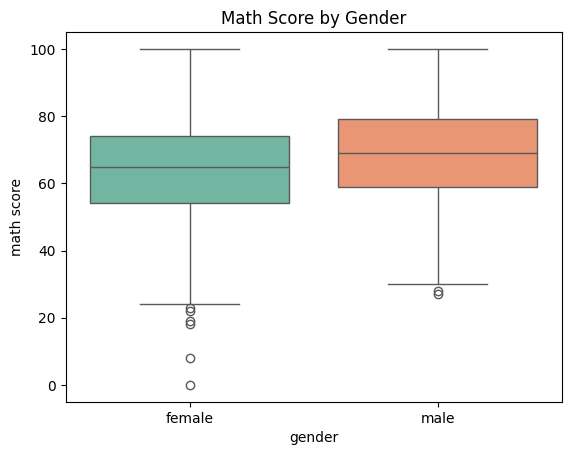

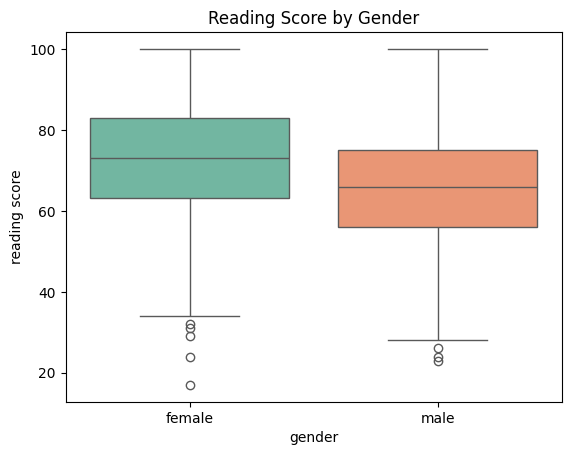

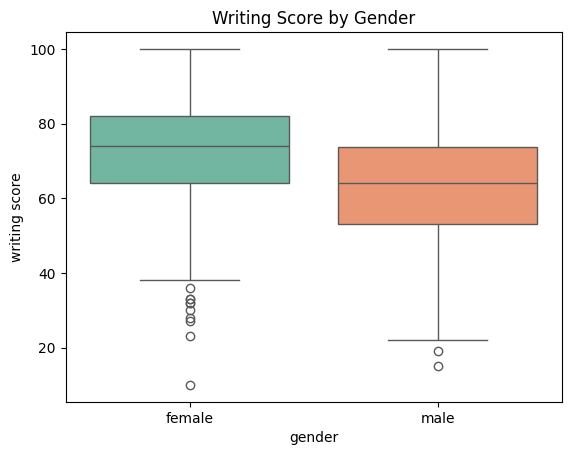

In [102]:
subjects = ['math score', 'reading score', 'writing score']
for subject in subjects:
    sns.boxplot(x='gender', y=subject, data=df, palette='Set2')
    plt.title(f'{subject.title()} by Gender')
    plt.show()

**Math Scores:** The median math score for male students is slightly higher than for female students, although both genders exhibit a similar range of scores.

**Reading and Writing Scores:** Female students consistently outperform male students in both reading and writing. The median scores for females are noticeably higher, and the overall distribution of scores is shifted upwards compared to their male counterparts.

**Insight:**
While male students have a slight edge in mathematics, female students show stronger performance in verbal skills. This suggests potential gender-based differences in learning styles or subject aptitude within this student cohort.






## 2. Does Test Preparation Improve Scores?

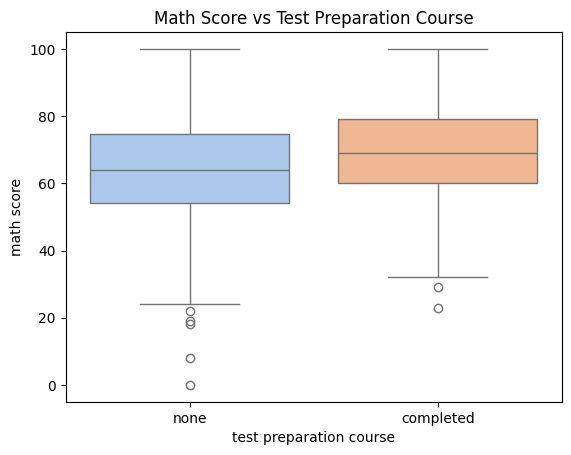

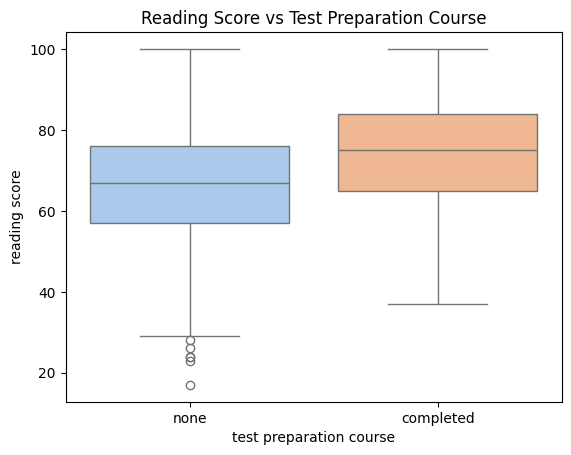

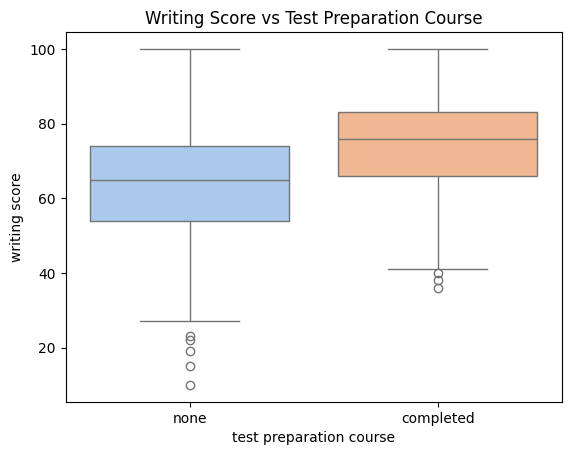

In [103]:
for subject in subjects:
    sns.boxplot(x='test preparation course', y=subject, data=df, palette='pastel')
    plt.title(f'{subject.title()} vs Test Preparation Course')
    plt.show()

**Score Distribution**:
The interquartile range (the middle 50% of scores) for students who completed test prep is higher, indicating that the course not only raises the average performance but also lifts the scores of the majority of participants.

**Insight:**
Students who completed a test preparation course consistently achieved higher median scores in math, reading, and writing compared to those who did not. This is a strong indicator that test preparation is an effective intervention for improving academic performance. The improvement is consistent across different subjects, highlighting the course's comprehensive benefits.






## 3. Does Parental Education Influence Performance?

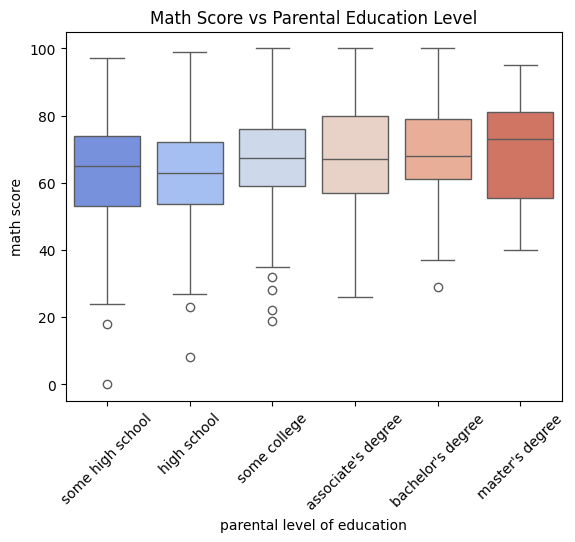

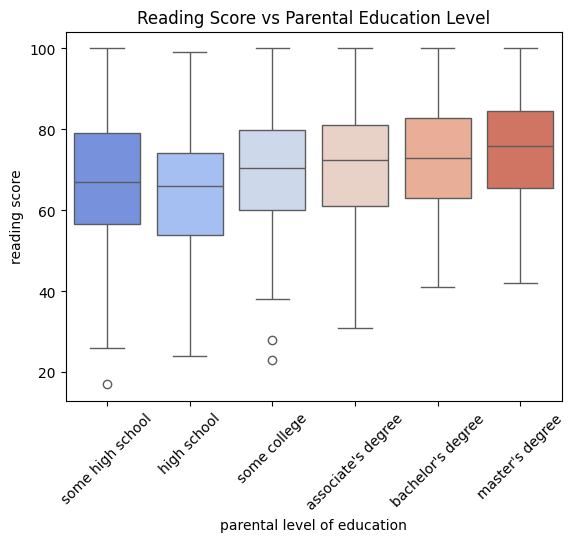

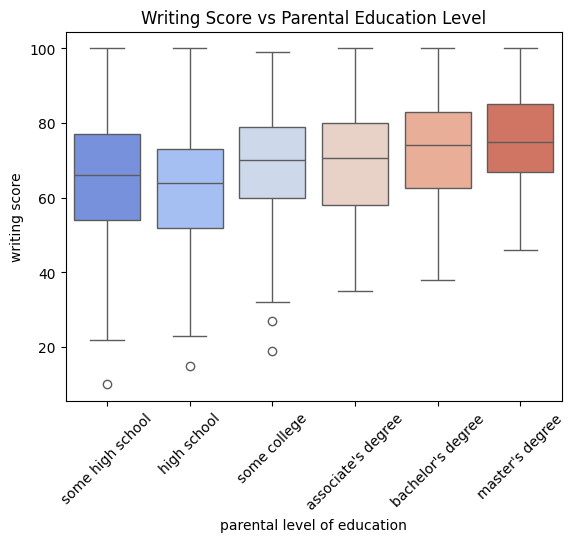

In [104]:
edu_order = [
    'some high school', 'high school', 'some college',
    "associate's degree", "bachelor's degree", "master's degree"
]

for subject in subjects:
    sns.boxplot(x='parental level of education', y=subject, data=df,
                order=edu_order, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f'{subject.title()} vs Parental Education Level')
    plt.show()

**Grade Distribution:** The stacked bar chart further illustrates this relationship. Students whose parents have a bachelor's or master's degree have a significantly higher proportion of 'A' and 'B' grades compared to those whose parents have a high school education or less. Conversely, the proportion of 'F' grades is highest among students whose parents have lower levels of education.

**Positive Trend:** There is a clear positive correlation between the level of parental education and the students' scores. As the parental education level increases from "some high school" to a "master's degree," the median scores of the students also tend to rise.

**Insight:** Parental education appears to be a significant predictor of student success. This may be due to a variety of factors, including a more academically enriching home environment, higher parental expectations, and greater access to educational resources.

## Interactive Chart

The interactive pie chart allows for a dynamic exploration of how test preparation impacts the distribution of grades.

**For 'A' Grade Students:** A higher percentage of students who achieved an 'A' grade had completed the test preparation course.

**For 'F' Grade Students:** Among students who received an 'F' grade, the vast majority had not taken the test preparation course.


In [105]:
df['test preparation course'] = df['test preparation course'].map({
    'none': 'No Prep',
    'completed': 'Prep Completed'
})

choose_selection = alt.selection_point(
    name='choose',
    fields=['grade'],
    bind=alt.binding_select(options=sorted(df['grade'].unique()), name='Select Grade')
)

alt.Chart(df).mark_arc().encode(
    theta=alt.Theta(field="grade", type="nominal", aggregate="count"),
    color=alt.Color(field="test preparation course", type="nominal"),
    tooltip=[
        alt.Tooltip(field="test preparation course", type="nominal"),
        alt.Tooltip(field="average score", type="quantitative", aggregate='mean'),
    ]
).add_params(
    choose_selection
).transform_filter(
    choose_selection
).properties(
    title="Average Scores by Test Preparation Course"
).interactive()

alt.Chart(...)

 **Overall Insight**
 This interactive visualization reinforces the conclusion that test preparation is strongly associated with higher grades. It provides a compelling visual argument for the effectiveness of such programs in helping students achieve academic excellence and avoid failure.

## Summary of Findings

| Question | Conclusion |
|----------|------------|
| **Do female and male students perform equally well across subjects?** | No. Female students perform better in reading and writing, males slightly better in math. |
| **Does completing a test preparation course improve performance?** | Yes. Students who completed the course perform better overall. |
| **How does parental education affect student performance?** | Higher parental education correlates with better student outcomes, especially in reading and writing. |


<br>

The analysis of the student performance dataset reveals significant insights into how various factors such as gender, test preparation, and parental education influence academic outcomes. The key findings indicate that female students generally outperform male students, particularly in reading and writing. Furthermore, students who complete a test preparation course show a marked improvement in scores across all subjects. Parental education also plays a role, with a trend showing that higher parental education levels often correlate with higher student scores.